In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
directory_path = '../raw_data/drive-download-20220127T182127Z-001/'
file_names = []

In [30]:
for i in range(1,26):
    if i < 10 :
        file_name = f'A0{i}.csv'
    else :
        file_name = f'A{i}.csv'
    file_names.append(file_name)

In [31]:
file_names

['A01.csv',
 'A02.csv',
 'A03.csv',
 'A04.csv',
 'A05.csv',
 'A06.csv',
 'A07.csv',
 'A08.csv',
 'A09.csv',
 'A10.csv',
 'A11.csv',
 'A12.csv',
 'A13.csv',
 'A14.csv',
 'A15.csv',
 'A16.csv',
 'A17.csv',
 'A18.csv',
 'A19.csv',
 'A20.csv',
 'A21.csv',
 'A22.csv',
 'A23.csv',
 'A24.csv',
 'A25.csv']

In [32]:
dataframes = {}
for file in file_names:
    df = pd.read_csv(directory_path+file)
    dataframes[file] = df

In [33]:
dataframes['A01.csv']

,Fecha,Desalineación Nacelle y Dirección de Viento Media 10M\n(°),Media de Potencia Activa 10M\n(kW),Posición Nacelle Media 10M\n(°),Velocidad Rotor Media 10M\n(rpm),Velocidad Viento Media 10M\n(m/s),Ángulo Pitch Media 10M\n(°)
0,01/05/19 00:00,358.0715,1357.58,194.0000,11.9402,8.8033,-0.7947
1,01/05/19 00:10,2.6265,1252.87,194.0000,11.5805,8.1260,-0.4205
2,01/05/19 00:20,1.8523,1661.33,194.0000,12.6022,9.0940,-0.3575
3,01/05/19 00:30,355.8858,1863.22,194.0000,12.8703,10.1518,0.6357
4,01/05/19 00:40,358.1590,1942.12,194.0000,12.9663,10.0442,0.4199
...,...,...,...,...,...,...,...
123358,30/09/21 23:10,5.9020,16.59,96.6405,8.1943,3.4053,2.9763
123359,30/09/21 23:20,4.2109,94.53,113.0000,8.1928,3.9127,2.4882
123360,30/09/21 23:30,5.5974,138.04,113.0000,8.1935,4.3475,1.9165
123361,30/09/21 23:40,355.4809,59.68,113.0000,8.1952,4.1030,2.2887


In [35]:
def add_timestamps():
    results = {}
    for file in file_names:
        df = dataframes[file]
        df['Fecha'] = pd.to_datetime(df['Fecha'])
        df.set_index('Fecha',inplace=True)
        ref_date_range = pd.date_range(start='1/05/2019', end='30/09/2021',freq='10T')
        ref_df = pd.DataFrame(index=ref_date_range)
        clean_data = df.reindex(ref_df.index)
        new_df = pd.merge(ref_df,clean_data,left_index=True, right_index=True,how='outer')
        results[file] = new_df
    return results


In [45]:
results = add_timestamps()

KeyError: 'Fecha'

In [43]:
df = results['A01.csv']

NameError: name 'results' is not defined

In [44]:
df.isna().sum()

Desalineación Nacelle y Dirección de Viento Media 10M\n(°)    1
Media de Potencia Activa 10M\n(kW)                            0
Posición Nacelle Media 10M\n(°)                               5
Velocidad Rotor Media 10M\n(rpm)                              2
Velocidad Viento Media 10M\n(m/s)                             1
Ángulo Pitch Media 10M\n(°)                                   3
dtype: int64

In [46]:
df

,Desalineación Nacelle y Dirección de Viento Media 10M\n(°),Media de Potencia Activa 10M\n(kW),Posición Nacelle Media 10M\n(°),Velocidad Rotor Media 10M\n(rpm),Velocidad Viento Media 10M\n(m/s),Ángulo Pitch Media 10M\n(°)
Fecha,,,,,,
2019-01-05 00:00:00,358.0715,1357.58,194.0000,11.9402,8.8033,-0.7947
2019-01-05 00:10:00,2.6265,1252.87,194.0000,11.5805,8.1260,-0.4205
2019-01-05 00:20:00,1.8523,1661.33,194.0000,12.6022,9.0940,-0.3575
2019-01-05 00:30:00,355.8858,1863.22,194.0000,12.8703,10.1518,0.6357
2019-01-05 00:40:00,358.1590,1942.12,194.0000,12.9663,10.0442,0.4199
...,...,...,...,...,...,...
2021-09-30 23:10:00,5.9020,16.59,96.6405,8.1943,3.4053,2.9763
2021-09-30 23:20:00,4.2109,94.53,113.0000,8.1928,3.9127,2.4882
2021-09-30 23:30:00,5.5974,138.04,113.0000,8.1935,4.3475,1.9165


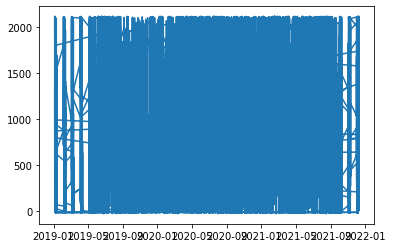

In [48]:
plt.plot(df['Media de Potencia Activa 10M\n(kW)'])